#**Title:** Employee Salary Prediction using ANN

#**Problem statement :**
Develop a Deep learning model, specifically an Artificial Neural Network (ANN) for Regression, to predict employee salaries based on various attributes such as education level, job title, and years of experience, using the provided synthetic dataset. The goal is to build a model that can accurately estimate salaries by capturing the logical relationships between these features.

#**Objective :**
The objective of this project is to build and evaluate an Artificial Neural Network model that can accurately predict employee salaries based on the provided dataset. This involves data loading, preprocessing, model building, training, and evaluation to achieve a reliable salary prediction model.


#**Data dictionary :**

* Employee_ID : Unique identifier for each employee

* Name : Full name
* Gender :	Male or Female
* Age : Age of the employee (based on education level and job title)
* Education_Level	: High School, Bachelor, Master, PhD
* Experience_Years : Number of years of professional experience
* Department : Business unit, e.g., HR, Engineering, Marketing, etc.
* Job_Title	: Role of the employee, e.g., Analyst, Engineer, Manager, etc.
* Location : Work location (e.g., New York, San Francisco, etc.)
* Salary : Annual salary in USD (target for regression)


**Dataset link :**
https://www.kaggle.com/datasets/gmudit/employer-data

#Importing necessary libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

#Loading dataset

In [2]:
df=pd.read_csv('/content/Employers_data.csv')
df.head()

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,2,John Mayes,56,Male,Sales,Executive,33,Master,Seattle,195000
2,3,Carlos Wille,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,4,Michael Bryant,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,5,Paula Douglas,25,Female,HR,Analyst,2,Master,Seattle,70000


In [3]:
#Checking the shape of the data
df.shape

(10000, 10)

**observations:**
*There are 10000 rows and 10 columns in the dataset.

In [4]:
#Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Employee_ID       10000 non-null  int64 
 1   Name              10000 non-null  object
 2   Age               10000 non-null  int64 
 3   Gender            10000 non-null  object
 4   Department        10000 non-null  object
 5   Job_Title         10000 non-null  object
 6   Experience_Years  10000 non-null  int64 
 7   Education_Level   10000 non-null  object
 8   Location          10000 non-null  object
 9   Salary            10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


**Observations:**
* All the columns has correct data type.

#Data Cleaniing

In [5]:
#Checking for NULL values
df.isnull().sum().any()

np.False_

* There are no Null values.

In [6]:
#Checking for duplicate values
df.duplicated().sum().any()

np.False_

* There are no duplicate values.

#Summary statistics

In [7]:
df.describe()

,Employee_ID,Age,Experience_Years,Salary
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,35.455900,12.370900,115381.500000
std,2886.89568,10.000213,9.148951,46066.139047
min,1.00000,21.000000,0.000000,25000.000000
25%,2500.75000,27.000000,5.000000,70000.000000
50%,5000.50000,34.000000,10.000000,120000.000000
75%,7500.25000,43.000000,19.000000,150000.000000
max,10000.00000,60.000000,37.000000,215000.000000


**Observations:**


*   **Age:** Mean (35.5) and median (34) are close, suggesting a relatively symmetrical distribution. The standard deviation (10) indicates a moderate spread.
*   **Experience Years:** Mean (12.4) is higher than the median (10), indicating a positive skew (more employees with less experience). The standard deviation (9.15) shows a significant spread.
*   **Salary:** Mean (115.4k) is slightly lower than the median (120k), suggesting a slight negative skew. The high standard deviation (46.1k) highlights a large spread in salaries.

#Exploratory Data Analysis

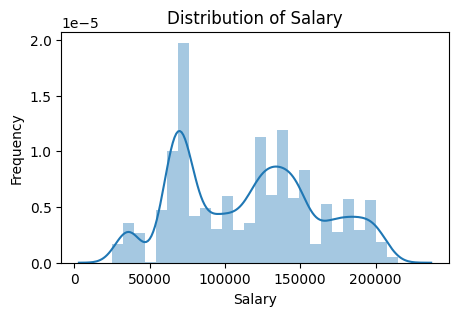

In [8]:
#Plotting the distribution of salary
plt.figure(figsize=(5,3))
sns.distplot(df['Salary'])
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

**Observations:**

* The salary distribution is bimodal with peaks around 70,000 USD and 150,000 USD.
* This suggests two distinct salary groups within the dataset.
* The distribution is not perfectly symmetrical and shows some skew.

In [9]:
# Getting the columns
df.columns

Index(['Employee_ID', 'Name', 'Age', 'Gender', 'Department', 'Job_Title',
       'Experience_Years', 'Education_Level', 'Location', 'Salary'],
      dtype='object')

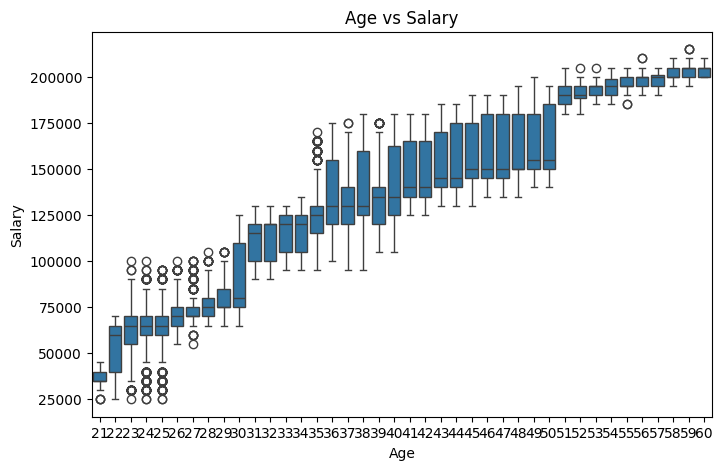

In [10]:
#Age vs salary
plt.figure(figsize =(8,5))
sns.boxplot(x='Age',y='Salary',data=df)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

**Observations from Age vs Salary Plot:**

*   Salaries generally increase with age.
*   Younger employees tend to have lower salaries with less variation.
*   Older employees have a wider range of salaries.
*   The median salary increases with age.

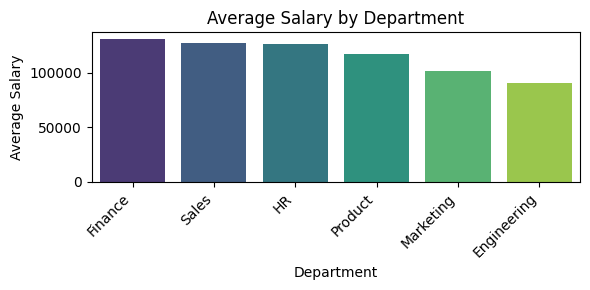

In [18]:
# Calculate the average salary by department
avg_salary_by_dept = df.groupby('Department')['Salary'].mean().sort_values(ascending=False)

# Plotting the average salary by department using seaborn
plt.figure(figsize=(6,3))
sns.barplot(x=avg_salary_by_dept.index, y=avg_salary_by_dept.values, palette='viridis')
plt.title('Average Salary by Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

**Observations from Average Salary by Department Plot:**

*   The plot clearly shows the average salary for each department.
*   The Finance department has the highest average salary, followed by Sales and HR.
*   Engineering and Marketing departments have the lowest average salaries.
*   There is a notable difference in average salaries across different departments, suggesting that the department is a relevant factor in determining salary.

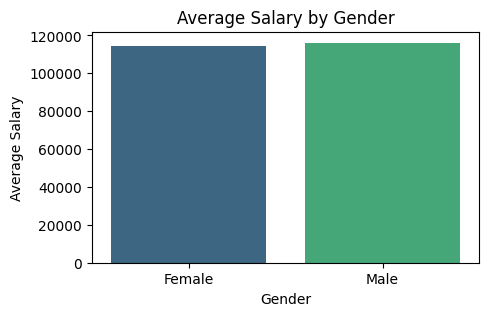

In [24]:
#Gender vs average salary
avg_salary_by_gender = df.groupby('Gender')['Salary'].mean()
plt.figure(figsize=(5,3))
sns.barplot(x=avg_salary_by_gender.index, y=avg_salary_by_gender.values, palette='viridis')
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.show()


Text(0, 0.5, 'Average Salary')

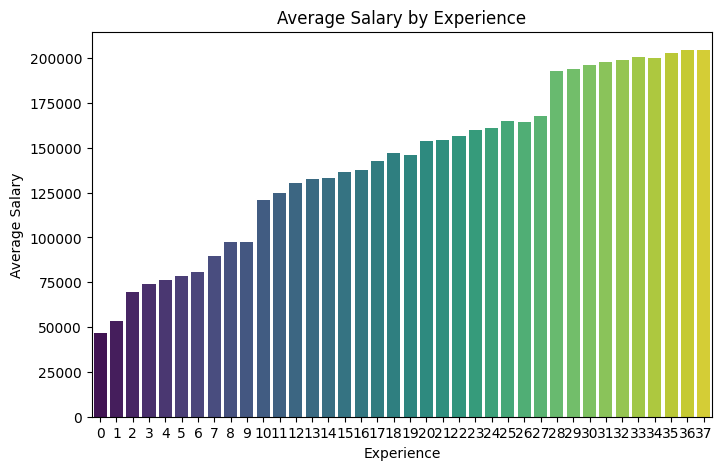

In [27]:
#Experience_level vs salary
avg_salary_by_experience = df.groupby('Experience_Years')['Salary'].mean()
plt.figure(figsize=(8,5))
sns.barplot(x=avg_salary_by_experience.index, y=avg_salary_by_experience.values, palette='viridis')
plt.title('Average Salary by Experience')
plt.xlabel('Experience')
plt.ylabel('Average Salary')

**Observations from Average Salary by Experience Plot:**

*   Average salary generally increases with years of experience.
*   There is a strong positive relationship between experience and salary.


Text(0.5, 1.0, 'Average Salary by Education Level')

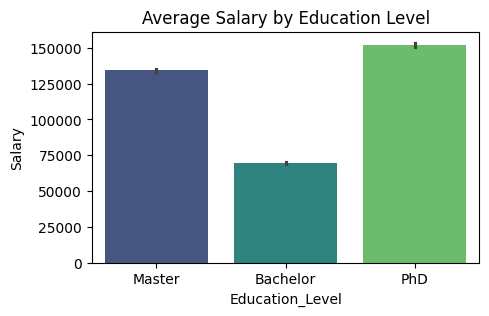

In [37]:
#Education_level vs salary
plt.figure(figsize=(5,3))
sns.barplot(x='Education_Level', y='Salary',data = df, palette='viridis')
plt.title('Average Salary by Education Level')

**Observations from Average Salary by Education Level Plot:**

*   Average salary increases significantly with higher education levels.
*   Employees with a PhD have the highest average salary, followed by those with a Master's degree.
*   Employees with a Bachelor's degree have the lowest average salary.
*   Education level is a strong predictor of average salary.

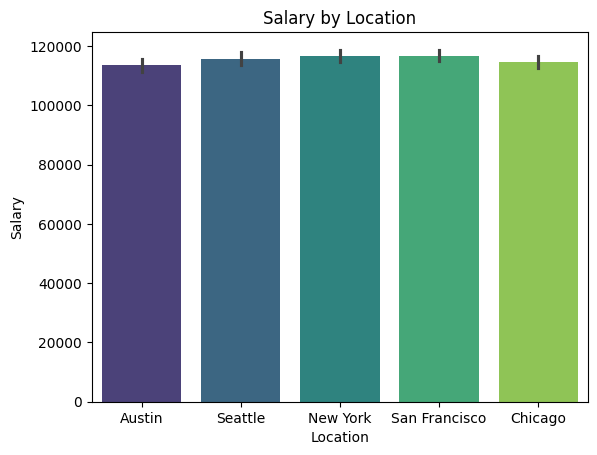

In [35]:
sns.barplot(x='Location', y='Salary',data = df, palette='viridis')
plt.title('Salary by Location')
plt.show()

**Observations from Average Salary by Education Level Plot:**

*   Average salary increases significantly with higher education levels.
*   Employees with a PhD have the highest average salary, followed by those with a Master's degree.
*   Employees with a Bachelor's degree have the lowest average salary.
*   Education level is a strong predictor of average salary.

**Observation from Average Salary by Location Plot:** There is only a slight variation in average salary across the different locations, suggesting location may not be a primary factor in salary determination in this dataset.

#Correlation using heatmap

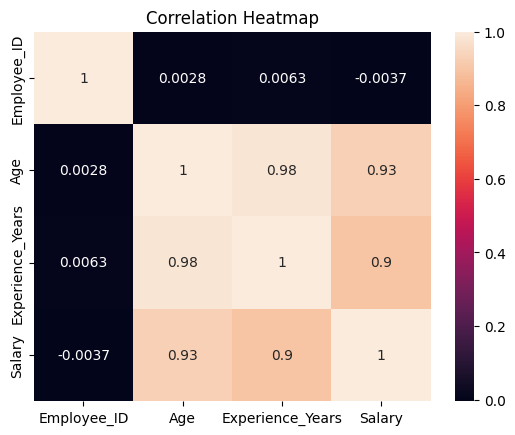

In [31]:
#Heatmap for correlation
sns.heatmap(df.select_dtypes(include =np.number).corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()


**Observations from Correlation Heatmap:**

*   There is a very strong positive correlation (0.98) between 'Age' and 'Experience_Years', which is expected as experience generally increases with age.
*   There is a strong positive correlation (0.93) between 'Age' and 'Salary', indicating that older employees tend to have higher salaries.
*   There is a strong positive correlation (0.90) between 'Experience_Years' and 'Salary', indicating that employees with more experience tend to have higher salaries.


#Data Preprocessing

In [38]:
# Seperating the data into input features and target variabe
X = df.drop('Salary', axis=1)
y = df['Salary']

In [39]:
# Getting the list of columns
print(X.columns)

Index(['Employee_ID', 'Name', 'Age', 'Gender', 'Department', 'Job_Title',
       'Experience_Years', 'Education_Level', 'Location'],
      dtype='object')


In [44]:
# Getting the list of categorical columns and numerical columns
categorical = ['Gender','Department', 'Job_Title','Education_Level','Location']
numerical = ['Age','Experience_Years']

In [45]:
# Preprocessing columns
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first'), categorical)
])

# Splitting the data into train and test

In [46]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [47]:
# Preprocessing the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

#Model Building

In [48]:
#Base line ANN model
model_base = Sequential([
    Dense(8, input_dim = X_train.shape[1], activation = 'relu'),
    Dense(1)
])

In [49]:
#Compiling the model
model_base.compile(optimizer = 'adam', loss = 'mse', metrics = ['r2_score'])

In [50]:
#Training the model
history_base = model_base.fit(X_train, y_train, validation_data = (X_test, y_test), epochs =100, verbose = 1)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 15260661760.0000 - r2_score: -6.1948 - val_loss: 15683334144.0000 - val_r2_score: -6.4461
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 15287612416.0000 - r2_score: -6.1000 - val_loss: 15680147456.0000 - val_r2_score: -6.4446
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 15260957696.0000 - r2_score: -6.2833 - val_loss: 15674991616.0000 - val_r2_score: -6.4422
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 15221710848.0000 - r2_score: -6.1595 - val_loss: 15668139008.0000 - val_r2_score: -6.4389
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 15264653312.0000 - r2_score: -6.2576 - val_loss: 15659757568.0000 - val_r2_score: -6.4349
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 15564317696.0000 - r2_score: -6.1959 - val_loss: 15649961984.0000 - val_r2_score: -6.4303
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 15162766336.0000 - r2_score: -6.1

In [51]:
#Model Evaluation
loss_base, r2_base = model_base.evaluate(X_test, y_test)
print(f' Loss(MSE): {loss_base}')
print(f' R2 Score: {r2_base}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11117946880.0000 - r2_score: -4.3596
 Loss(MSE): 11227471872.0
 R2 Score: -4.330565452575684


**Observations:**

* Negative value of R2 score means that if we would have given
average value as predicted value for every data point,
it would have been better than creating the model.

**Building an Optimal Model**

In [52]:
#Optimized ANN model with Dropout

from tensorflow.keras.layers import Dropout

#Optimized model with Dropouts

model_opt = Sequential([
    Dense(128, input_dim = X_train.shape[1], activation = 'relu'),
    Dropout(0.3),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.1),
    Dense(1)
])

In [53]:
#Compiling the model
model_opt.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                                                       loss = 'mse', metrics = ['r2_score'])

In [54]:
#Early stopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights =True)

In [55]:
#Training the model
history_opt = model_opt.fit(X_train, y_train, validation_data = (X_test, y_test),
                             epochs = 100, batch_size = 32, callbacks = [early_stop], verbose = 1)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 14929389568.0000 - r2_score: -6.0458 - val_loss: 8072139776.0000 - val_r2_score: -2.8325
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3713037824.0000 - r2_score: -0.7494 - val_loss: 437399680.0000 - val_r2_score: 0.7923
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 597396800.0000 - r2_score: 0.7142 - val_loss: 328817760.0000 - val_r2_score: 0.8439
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 510604960.0000 - r2_score: 0.7605 - val_loss: 268762464.0000 - val_r2_score: 0.8724
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 444748896.0000 - r2_score: 0.7889 - val_loss: 219066096.0000 - val_r2_score: 0.8960
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 407398656.0000 - r2_score: 0.8086 - val_loss: 186328368.0000 - val_r2_score: 0.9115
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 378762624.0000 - r2_score: 0.8235 - val_loss: 160236048.0000 -

In [56]:
#Evaluating the model on training data
train_loss_opt, train_r2_opt = model_opt.evaluate(X_train, y_train)
print(f'Train Loss(MSE): {train_loss_opt}')
print(f'Train R2 Score: {train_r2_opt}')

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 19171482.0000 - r2_score: 0.9908
Train Loss(MSE): 19198092.0
Train R2 Score: 0.9909672737121582


In [57]:
#Evaluating the model on test data
test_loss_opt, test_r2_opt = model_opt.evaluate(X_test, y_test)
print(f'Test Loss(MSE): {test_loss_opt}')
print(f'Test R2 Score: {test_r2_opt}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18276678.0000 - r2_score: 0.9912
Test Loss(MSE): 18330256.0
Test R2 Score: 0.99129718542099


#Comparing Baseline and optimal model learning curves

**Observations from Optimized Model Evaluation:**

*   The optimized model achieved a low Mean Squared Error (MSE) on both the training (19.2M) and test (18.3M) datasets, indicating that the model's predictions are close to the actual salaries.
*   The R2 score for both the training (0.991) and test (0.991) datasets are very close to 1. This suggests that the model explains a very high percentage of the variance in the salary data. An R2 score of 0.991 means that approximately 99.1% of the variability in salary can be explained by the features in the model.
*   The performance on the training and test sets are very similar, which indicates that the model is not significantly overfitting to the training data.
*   Compared to the baseline model (which had a negative R2 score), the optimized model shows a dramatic improvement in performance, demonstrating the effectiveness of the added layers, dropout, and optimized learning rate.

#Comparing Learning curves

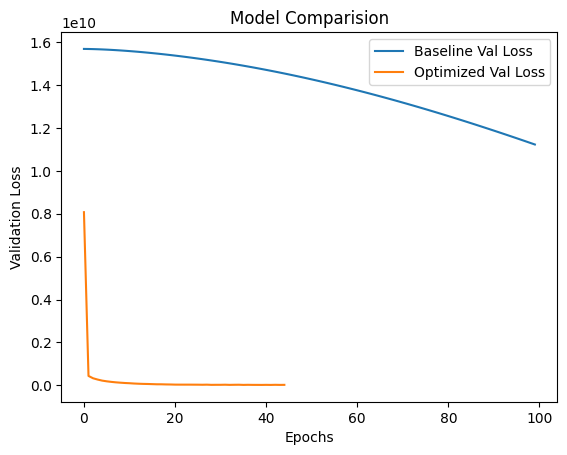

In [58]:
#Compare Learning curves
plt.plot(history_base.history['val_loss'], label ='Baseline Val Loss')
plt.plot(history_opt.history['val_loss'], label ='Optimized Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Model Comparision')
plt.legend()
plt.show()

#Predictions on test set

In [61]:
#Predictions
#Example from test set
sample = X_test[2].reshape(1, -1)
predicted_Salary = model_opt.predict(sample)
print(f'Predicted Salary: {predicted_Salary}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Salary: [[103657.99]]


In [62]:
df.columns

Index(['Employee_ID', 'Name', 'Age', 'Gender', 'Department', 'Job_Title',
       'Experience_Years', 'Education_Level', 'Location', 'Salary'],
      dtype='object')

In [63]:
df.head()

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,2,John Mayes,56,Male,Sales,Executive,33,Master,Seattle,195000
2,3,Carlos Wille,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,4,Michael Bryant,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,5,Paula Douglas,25,Female,HR,Analyst,2,Master,Seattle,70000


In [65]:
#Custom Input Example
custom_data = pd.DataFrame({
    'Age': [36],
    'Gender': ['Male'],
    'Department': ['Engineering'],
    'Job_Title': ['Intern'],
    'Experience_Years': [12],
    'Education_Level': ['Bachelor'],
    'Location': ['New York']
})
custom_processed = preprocessor.transform(custom_data)
predicted_Salary = model_opt.predict(custom_processed)
print(f'Predicted Salary: {predicted_Salary}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Salary: [[53770.07]]


#Actual vs Predicted plot

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


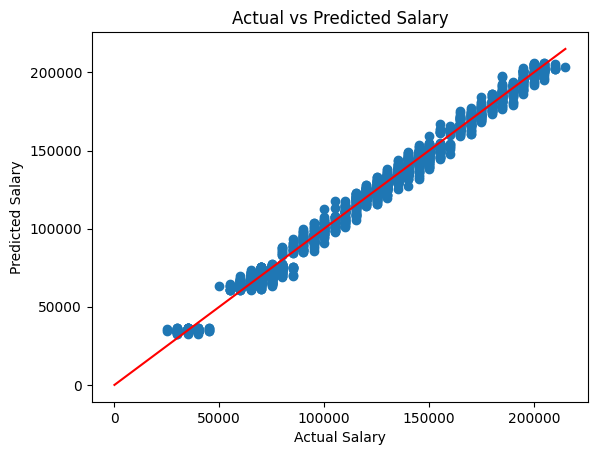

In [66]:
#Actual vs Predicted plot
y_pred = model_opt.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.plot([0, max(y_test)], [0, max(y_test)], color = 'red')
plt.show()

**Observations:**

The plot shows a good correlation between actual and predicted charges, with points following the red line.

**Most Influential Features for Salary Prediction:**

Based on the exploratory data analysis, the following features appear to be the most influential in predicting employee salary:

*   **Experience Years:** The correlation heatmap showed a strong positive correlation (0.90) between 'Experience_Years' and 'Salary'. The bar plot of average salary by experience also demonstrated a clear trend of increasing salary with more years of experience.
*   **Age:** 'Age' also showed a strong positive correlation (0.93) with 'Salary' in the heatmap. This is closely related to experience, as age and experience are highly correlated (0.98).
*   **Education Level:** The bar plot of average salary by education level indicated a significant increase in average salary with higher education degrees (Master's and PhD having notably higher average salaries than Bachelor's).
*   **Department:** The bar plot of average salary by department showed noticeable differences in average salaries across different departments, with Finance, Sales, and HR having higher averages than Engineering and Marketing.

Features like 'Gender' and 'Location' appeared to have less significant impact on average salary in our initial analysis. While 'Employee_ID' and 'Name' are identifiers and not predictive features.

## Project Summary and Conclusion

This project aimed to develop and evaluate an Artificial Neural Network (ANN) model for predicting employee salaries based on a synthetic dataset.

*   **Key Insights from EDA:**
    *   Salary distribution is bimodal.
    *   Age, Experience Years (highly correlated), Education Level, and Department are key features influencing salary.
    *   Gender and Location showed less impact on average salary.

*   **Data Preprocessing:**
    *   Separated features (X) and target (y).
    *   Identified numerical and categorical columns.
    *   Applied scaling (StandardScaler) to numerical features and one-hot encoding to categorical features.
    *   Split data into training and testing sets.

*   **Model Building and Training:**
    *   Built a baseline ANN model with poor initial performance (negative R2).
    *   Developed an optimized ANN model with multiple dense and Dropout layers.
    *   Compiled with Adam optimizer, using MSE loss and R2 metric.
    *   Trained with Early Stopping to prevent overfitting.

*   **Model Performance Comparison:**
    *   Baseline model performed worse than a simple average prediction (negative R2).
    *   Optimized model showed significant improvement:
        *   Low MSE on training (19.2M) and test (18.3M) sets.
        *   High R2 scores (~0.991 for both), indicating excellent predictive power.
        *   Similar performance on training and test sets, suggesting minimal overfitting.
    *   Actual vs Predicted plot visually confirmed strong performance.

*   **Challenges Faced and How They Were Solved:**
    *   Initial baseline model's poor performance was a challenge.
    *   Solved by building a more complex optimized ANN with multiple layers and regularization (Dropout).
    *   Early Stopping was used to train a robust model and prevent overfitting.

*   **Conclusion:**
    *   The optimized ANN model successfully predicted employee salaries with high accuracy.
    *   EDA highlighted influential features: Experience Years, Age, Education Level, and Department.
    *   The optimized model is a reliable tool for salary estimation in this context.